# Wave Propagation Method and BPM in 3D

WPM method is very fast. It is based on S. Schmidt et al., “Wave-optical modeling beyond the thin-element-approximation,” Opt. Express, vol. 24, no. 26, p. 30188, 2016.


In [4]:
from diffractio import np, plt, sp, um, mm, degrees
from diffractio.scalar_fields_XYZ import Scalar_field_XYZ

from diffractio.scalar_masks_XY import Scalar_mask_XY
from diffractio.scalar_sources_XY import Scalar_source_XY
from diffractio.scalar_masks_XYZ import Scalar_mask_XYZ

number of processors: 8
total memory        : 7.5 Gb
available memory    : 35 %
max frequency       : 4000 GHz


In [5]:
from matplotlib import rcParams
rcParams['figure.dpi']=150

## Propagation at vacuum

In [29]:
x=np.linspace(-50*um,50*um, 256)
y=np.linspace(-50*um,50*um, 256)
z=np.linspace(0,500*um,256)
wavelength=.6*um

In [30]:
t0=Scalar_mask_XY(x,y,wavelength)
t0.circle(r0=(0,0), radius=45*um, angle=0)

In [31]:
u=Scalar_mask_XYZ(x,y, z, wavelength)
u.incident_field(u0=t0)

## WPM

Time = 4.71 s, time/loop = 18.38 ms
CPU times: user 4.85 s, sys: 87.8 ms, total: 4.94 s
Wall time: 4.88 s


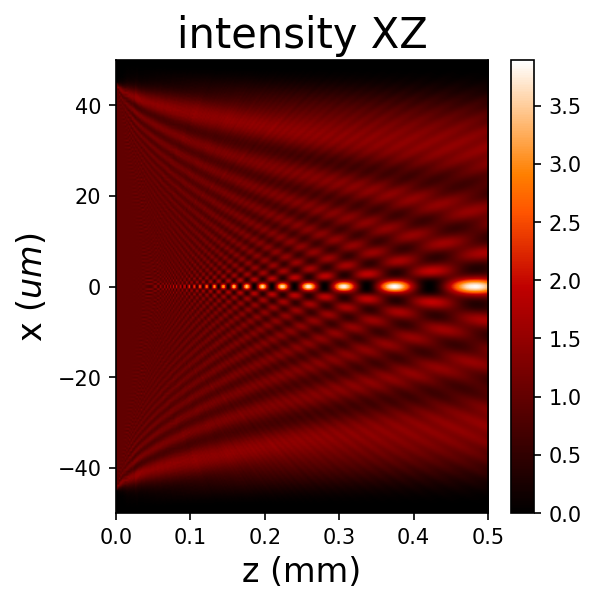

In [32]:
%%time
u.clear_field()
u.WPM(verbose=True, has_edges=True)
u.draw_XZ(y0=0, logarithm=False)

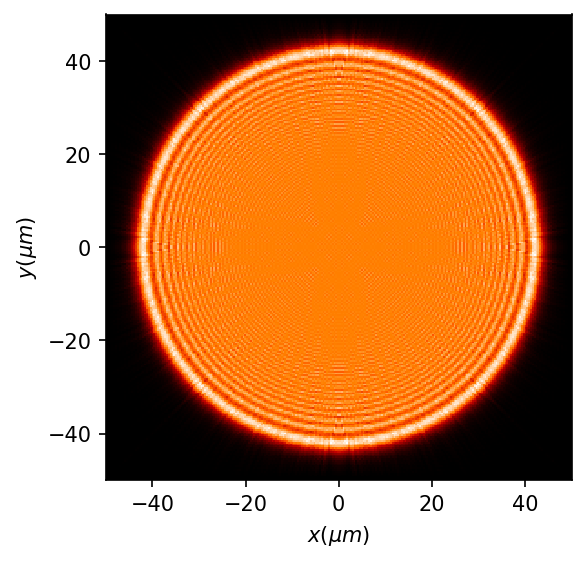

In [33]:
u.draw_XY(z0=20, logarithm=True)

In [34]:
u.draw_XYZ()

## BPM

CPU times: user 2.22 s, sys: 91.4 ms, total: 2.31 s
Wall time: 2.26 s


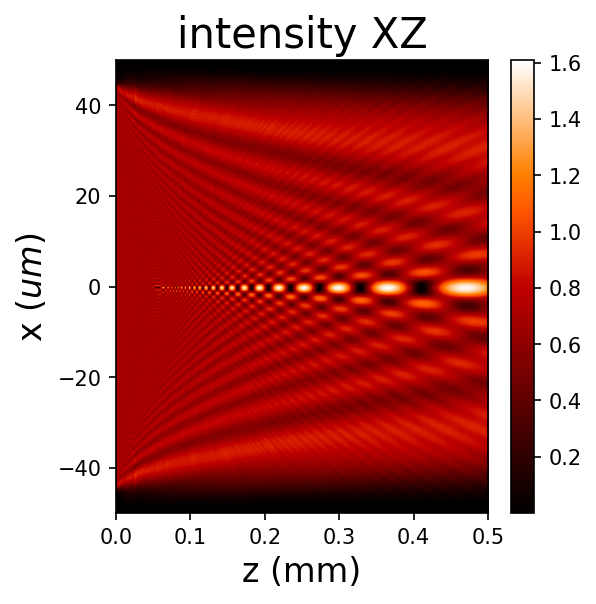

In [35]:
%%time
u.clear_field()
u.BPM(verbose=True, has_edges=True)
u.draw_XZ(y0=0, logarithm=True);

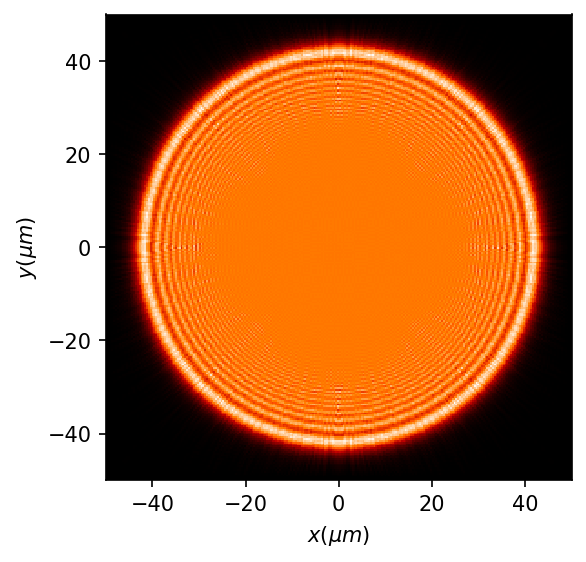

In [36]:
u.draw_XY(z0=20, logarithm=True)

At vacuum both techniques work fine.

## Diffraction by an sphere

WPM and BPM also allow propagation through a XYZ refraction index structure.


In [6]:
x=np.linspace(-15*um,15*um,256 )
y=np.linspace(-15*um,15*um, 256)
z=np.linspace(0,30*um,256)
wavelength=0.6328*um

In [7]:
t0=Scalar_mask_XY(x,y,wavelength)
t0.circle(r0=(0,0), radius=12.5*um, angle=0)

u0=Scalar_source_XY(x,y,wavelength)
u0.plane_wave(A=1)

In [8]:
u=Scalar_mask_XYZ(x,y, z, wavelength)
u.sphere(r0=(0,0,12.5), radius=10*um, refraction_index=2, angles=(0,0,0));

In [9]:
u.incident_field(u0=u0*t0)

In [13]:
u.draw_refraction_index()

close the window to continue


### WPM

In [10]:
%%time
u.clear_field()
u.WPM(verbose=True,has_edges=True)

Time = 5.85 s, time/loop = 22.85 ms
CPU times: user 5.94 s, sys: 96.5 ms, total: 6.04 s
Wall time: 5.95 s


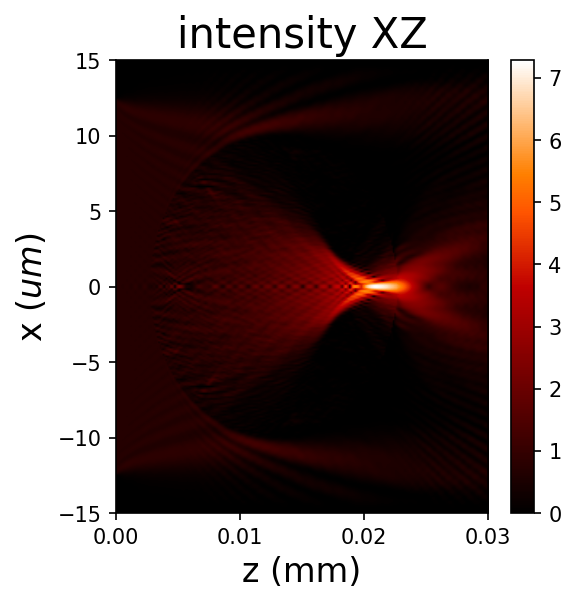

In [11]:
u.draw_XZ(y0=0, logarithm=True);

In [12]:
u2=u.cut_resample([-10,10],[-10,10], num_points=(128,128,128),new_field=True)

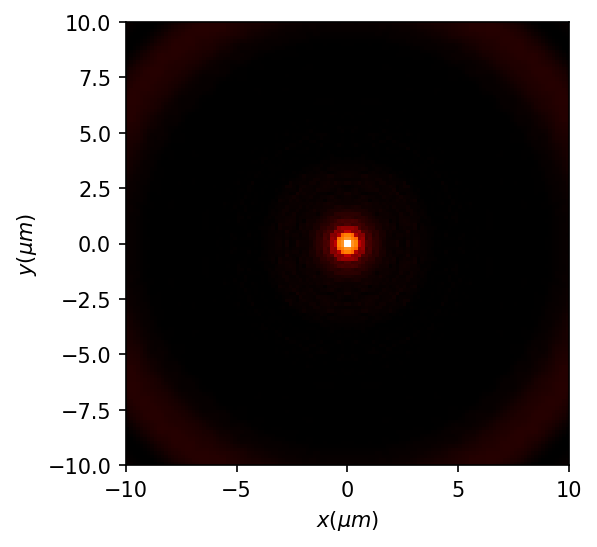

In [13]:
u2.draw_XY(z0=20.5, logarithm=True)

In [18]:
u.draw_XYZ(logarithm=True)

### BPM

In [14]:
%%time
u.clear_field()
u.BPM(verbose=True,has_edges=True)

CPU times: user 1.98 s, sys: 102 ms, total: 2.08 s
Wall time: 2.03 s


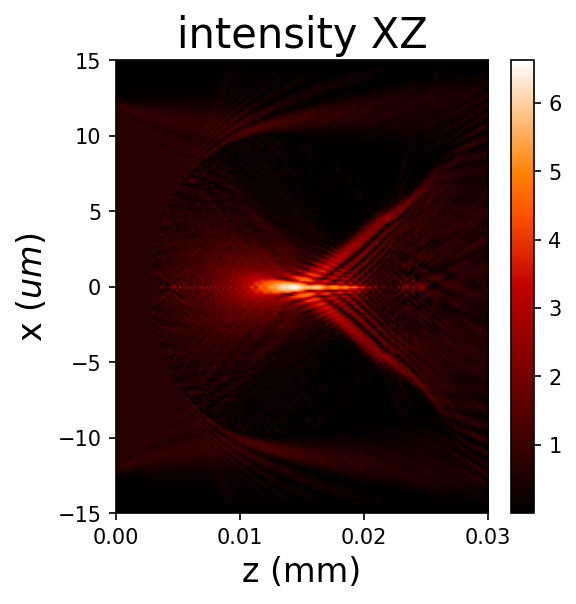

In [15]:
u.draw_XZ(y0=0, logarithm=True);

In this case, the results are quite different. As the difference of refraction indexes is high, WPM produces better results.